In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

data = {
    '色泽': ['青绿', '乌黑', '乌黑', '青绿', '浅白', '青绿', '乌黑', '乌黑', '乌黑', '青绿', '浅白', '浅白', '青绿', '浅白', '乌黑', '浅白', '青绿'],
    '根蒂': ['蜷缩', '蜷缩', '蜷缩', '蜷缩', '蜷缩', '稍蜷', '稍蜷', '蜷缩', '稍蜷', '硬挺', '硬挺', '蜷缩', '稍蜷', '稍蜷', '蜷缩', '蜷缩', '蜷缩'],
    '敲声': ['浊响', '沉闷', '浊响', '沉闷', '浊响', '浊响', '浊响', '浊响', '沉闷', '清脆', '清脆', '浊响', '清脆', '沉闷', '浊响', '沉闷', '沉闷'],
    '纹理': ['清晰', '清晰', '清晰', '清晰', '清晰', '稍糊', '稍糊', '稍糊', '稍糊', '清晰', '模糊', '模糊', '清晰', '清晰', '清晰', '清晰', '清晰'],
    '脐部': ['凹陷', '凹陷', '凹陷', '凹陷', '凹陷', '稍凹', '稍凹', '稍凹', '稍凹', '平坦', '平坦', '平坦', '凹陷', '稍凹', '稍凹', '平坦', '稍凹'],
    '触感': ['硬滑', '硬滑', '硬滑', '硬滑', '硬滑', '软粘', '软粘', '硬滑', '硬滑', '软粘', '软粘', '软粘', '硬滑', '软粘', '软粘', '软粘', '硬滑'],
    '好瓜': ['是', '是', '是', '是', '是', '是', '是', '否', '否', '否', '否', '否', '否', '否', '否', '否', '否']
}

In [3]:
df = pd.DataFrame(data)
le = LabelEncoder()  #将分类标签转换为数值标签
print(df.columns)
print(df)


Index(['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '好瓜'], dtype='object')
    色泽  根蒂  敲声  纹理  脐部  触感 好瓜
0   青绿  蜷缩  浊响  清晰  凹陷  硬滑  是
1   乌黑  蜷缩  沉闷  清晰  凹陷  硬滑  是
2   乌黑  蜷缩  浊响  清晰  凹陷  硬滑  是
3   青绿  蜷缩  沉闷  清晰  凹陷  硬滑  是
4   浅白  蜷缩  浊响  清晰  凹陷  硬滑  是
5   青绿  稍蜷  浊响  稍糊  稍凹  软粘  是
6   乌黑  稍蜷  浊响  稍糊  稍凹  软粘  是
7   乌黑  蜷缩  浊响  稍糊  稍凹  硬滑  否
8   乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑  否
9   青绿  硬挺  清脆  清晰  平坦  软粘  否
10  浅白  硬挺  清脆  模糊  平坦  软粘  否
11  浅白  蜷缩  浊响  模糊  平坦  软粘  否
12  青绿  稍蜷  清脆  清晰  凹陷  硬滑  否
13  浅白  稍蜷  沉闷  清晰  稍凹  软粘  否
14  乌黑  蜷缩  浊响  清晰  稍凹  软粘  否
15  浅白  蜷缩  沉闷  清晰  平坦  软粘  否
16  青绿  蜷缩  沉闷  清晰  稍凹  硬滑  否


In [25]:
for column in df.columns:   #df.columns   列索引标签
    df[column] = le.fit_transform(df[column])#将分类标签转换为数值标签
print(df)

    色泽  根蒂  敲声  纹理  脐部  触感  好瓜
0    2   2   1   1   0   0   1
1    0   2   0   1   0   0   1
2    0   2   1   1   0   0   1
3    2   2   0   1   0   0   1
4    1   2   1   1   0   0   1
5    2   1   1   2   2   1   1
6    0   1   1   2   2   1   1
7    0   2   1   2   2   0   0
8    0   1   0   2   2   0   0
9    2   0   2   1   1   1   0
10   1   0   2   0   1   1   0
11   1   2   1   0   1   1   0
12   2   1   2   1   0   0   0
13   1   1   0   1   2   1   0
14   0   2   1   1   2   1   0
15   1   2   0   1   1   1   0
16   2   2   0   1   2   0   0


In [5]:
X = df.drop('好瓜', axis=1)
print(X)
print(f"x的列数为{X.shape[1]}")
y = df['好瓜']
print(y)
#分离标签和特征

    色泽  根蒂  敲声  纹理  脐部  触感
0    2   2   1   1   0   0
1    0   2   0   1   0   0
2    0   2   1   1   0   0
3    2   2   0   1   0   0
4    1   2   1   1   0   0
5    2   1   1   2   2   1
6    0   1   1   2   2   1
7    0   2   1   2   2   0
8    0   1   0   2   2   0
9    2   0   2   1   1   1
10   1   0   2   0   1   1
11   1   2   1   0   1   1
12   2   1   2   1   0   0
13   1   1   0   1   2   1
14   0   2   1   1   2   1
15   1   2   0   1   1   1
16   2   2   0   1   2   0
x的列数为6
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
Name: 好瓜, dtype: int32


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.values)
print(y_train)
print(X_test)

[[1 2 1 0 1 1]
 [0 2 1 1 2 1]
 [0 1 0 2 2 0]
 [1 1 0 1 2 1]
 [0 2 1 1 0 0]
 [2 0 2 1 1 1]
 [2 2 0 1 2 0]
 [1 2 1 1 0 0]
 [0 2 1 2 2 0]
 [1 0 2 0 1 1]
 [2 1 2 1 0 0]
 [2 2 0 1 0 0]
 [0 1 1 2 2 1]]
11    0
14    0
8     0
13    0
2     1
9     0
16    0
4     1
7     0
10    0
12    0
3     1
6     1
Name: 好瓜, dtype: int32
    色泽  根蒂  敲声  纹理  脐部  触感
0    2   2   1   1   0   0
1    0   2   0   1   0   0
5    2   1   1   2   2   1
15   1   2   0   1   1   1


# 计算信息熵
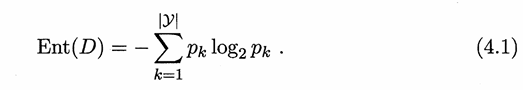

In [8]:
def entropy(y):
    hst = np.bincount(y)#统计类别标签或离散数据的次数
    ps = hst / len(y)   #每个标签所占比例
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

# 计算信息增益   
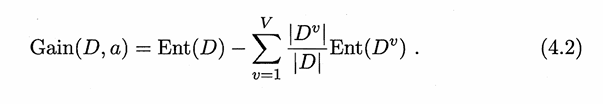

In [9]:
def information_gain(X, y, feature):
    original_entropy = entropy(y)
    values, counts = np.unique(X[:, feature], return_counts=True)#计算feature列下，每个标签出现的次数
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(y[X[:, feature] == values[i]]) for i in range(len(values))])
    return original_entropy - weighted_entropy

# 找到信息增益最大的特征

In [10]:
def best_feature_to_split(X, y):
    information_gains = [information_gain(X, y, feature) for feature in range(X.shape[1])] # X.shape[1]=6
    print(information_gains)
    return np.argmax(information_gains)

# 构建决策树

In [11]:
def build_tree(X, y, features):
    if len(np.unique(y)) == 1:  #unique查找数组中唯一值的函数
        #如果 y 中的所有样本都属于同一类（即目标变量只有一个唯一值）
        #则返回这个唯一值作为树的叶子节点。这意味着不需要进一步分裂，已经得到了分类结果。
        return y[0]
    if len(features) == 0:
        #如果没有更多的特征可用于分裂，则返回 y 中最常见的标签作为叶子节点。
        #这是为了处理特征用尽的情况
        return Counter(y).most_common(1)[0][0]   #返回一个包含最常见元素及其计数的列表。 [('0',3)]   
    
    best_feature = best_feature_to_split(X, y)
    tree = {features[best_feature]: {}} #创建树的根节点
    #从特征列表中移除已经用作分裂的特征，以避免在后续递归中再次使用。
    features = [f for i, f in enumerate(features) if i != best_feature] 
    
    for value in np.unique(X[:, best_feature]):
        subtree = build_tree(X[X[:, best_feature] == value], y[X[:, best_feature] == value], features)
        tree[list(tree.keys())[0]][value] = subtree
    
    return tree

# 利用决策树进行预测

In [12]:
def predict(tree, sample):
    if not isinstance(tree, dict):  #判断是叶节点还是内部节点
        return tree
    feature = list(tree.keys())[0]
    subtree = tree[feature].get(sample[feature])
    if subtree is None:
        return Counter(y_train).most_common(1)[0][0]
    return predict(subtree, sample)

features = X_train.columns.tolist()
print(features)
print(X_train.values)
print(y_train.values)
tree = build_tree(X_train.values, y_train.values, features)

['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']
[[1 2 1 0 1 1]
 [0 2 1 1 2 1]
 [0 1 0 2 2 0]
 [1 1 0 1 2 1]
 [0 2 1 1 0 0]
 [2 0 2 1 1 1]
 [2 2 0 1 2 0]
 [1 2 1 1 0 0]
 [0 2 1 2 2 0]
 [1 0 2 0 1 1]
 [2 1 2 1 0 0]
 [2 2 0 1 0 0]
 [0 1 1 2 2 1]]
[0 0 0 0 1 0 0 1 0 0 0 1 1]
[0.01780102730053701, 0.11036014405977657, 0.17932914038591197, 0.09123321517616911, 0.34085725347128704, 0.05997383390180788]
[0.31127812445913283, 0.8112781244591328, 0.8112781244591328, 0.0, 0.0, 0.0]
[0.10917033867559889, 0.19087450462110933, 0.19087450462110933, 0.19087450462110933, 0.0, 0.19087450462110933]
[0.2516291673878229, 0.0, 0.9182958340544896, 0.2516291673878229, 0.0, 0.2516291673878229]


In [13]:
print("决策树结构：")
pprint(tree)
print(list(tree.keys())[0])
y_pred = [predict(tree, sample) for sample in X_test.to_dict(orient="records")]
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

决策树结构：
{'脐部': {0: {'根蒂': {1: 0, 2: 1}},
        1: 0,
        2: {'根蒂': {1: {'纹理': {0: 0, 1: 1}}, 2: 0}}}}
脐部
Accuracy: 0.75


In [14]:
sample = X_test.to_dict(orient="records")
sample


[{'色泽': 2, '根蒂': 2, '敲声': 1, '纹理': 1, '脐部': 0, '触感': 0},
 {'色泽': 0, '根蒂': 2, '敲声': 0, '纹理': 1, '脐部': 0, '触感': 0},
 {'色泽': 2, '根蒂': 1, '敲声': 1, '纹理': 2, '脐部': 2, '触感': 1},
 {'色泽': 1, '根蒂': 2, '敲声': 0, '纹理': 1, '脐部': 1, '触感': 1}]

In [28]:
feature = list(tree.keys())[0]
print(feature)
test = sample[0]
test

脐部


{'色泽': 2, '根蒂': 2, '敲声': 1, '纹理': 1, '脐部': 0, '触感': 0}

In [16]:
feature = list(tree.keys())[0]
subtree = tree[feature].get(test[feature])
print(feature)
print(subtree)

脐部
{'根蒂': {1: 0, 2: 1}}


In [17]:
pprint(tree)

{'脐部': {0: {'根蒂': {1: 0, 2: 1}},
        1: 0,
        2: {'根蒂': {1: {'纹理': {0: 0, 1: 1}}, 2: 0}}}}


In [18]:
Counter(y_train).most_common(1)[0][0]

0

In [19]:
feature = list(subtree.keys())[0]
feature

'根蒂'

In [20]:
test[feature]

2

In [21]:
subtrees = subtree[feature].get(test[feature])
subtrees

1